<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lab13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab13.ipynb")

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lab 13: k-NN

## References

* [Sections 17.0 - 17.6 of the Textbook](https://ccsf-math-108.github.io/textbook/chapters/17/Classification.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Code Reference](https://ccsf-math-108.github.io/materials-sp25/resources/code-reference.html)

---

## Lab Assignment Reminders

- 🚨 Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- Your tasks are categorized as auto-graded (📍) and manually graded (📍🔎):
    - **For all auto-graded tasks:**
        - Replace the `...` in the provided code cell with your own code.
        - Run the `grader.check` code cell to execute tests on your code.
        - There are no hidden auto-grader tests in the lab assignments. This means if you pass the tests, you can assume you've completed the task successfully.
    - **For all manually graded tasks:**
        - You may need to provide your own response to the provided prompt. Replace the template text "_Type your answer here, replacing this text._" with your own words.
        - You might need to produce a graphic or another output using code. Replace the `...` in the code cell to generate the image, table, etc.
        - In either case, check your response with a classmate, a tutor, or the instructor before moving on.
- Throughout this assignment and all future ones, please **do not re-assign variables** throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you may fail tests that you thought you were passing previously!_
- You may [submit](#Submit-Your-Assignment-to-Canvas) this assignment as many times as you want before the deadline. Your instructor will score the last version you submit once the deadline has passed.
- **Collaborating on labs is encouraged!** You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) However, please don't just share answers.

---

## Configure the Notebook

Run the following cell to configure this Notebook.

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## 🐧 Penguins of the Palmer Archipelago

<a href="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" title="The Palmer Archipelago penguins. Artwork by @allison_horst."><img src="lter_penguins.png" width="50%" alt="The Palmer Archipelago penguins. Artwork by @allison_horst."></a>

[Dr. Kristen Gorman](https://www.uaf.edu/cfos/people/faculty/detail/kristen-gorman.php) is a renowned marine biologist whose research often focuses on penguins, particularly in Antarctica. She was with the [Palmer Station Long Term Ecological Research Program](https://pallter.marine.rutgers.edu/), part of the [US Long Term Ecological Research Network](https://lternet.edu/). From 2007 through 2009, Gorman gathered several measurements from three species of penguins, Adélie [[1](#Citations)], chinstrap [[2](#Citations)], and gentoo [[3](#Citations)], along the Palmer Archipelago near Palmer Station.

<a href="https://en.wikipedia.org/wiki/Palmer_Archipelago" title="Palmer Archipelago
"><img src="./palmer_archipelago.jpeg" alt="Map of the Palmer archipelago" width=30%></a>

We imported the data sets for each penguin species directly from the [Environmental Data Initiative (EDI) Data Portal](https://portal.edirepository.org/nis/home.jsp) and combined them into one file `penguins.csv`. These data are available for use by [CC0 license](https://creativecommons.org/public-domain/cc0/) ("No Rights Reserved").

Run the following code cell to load the data as `penguins`.

In [ ]:
penguins = Table.read_table('penguins.csv')
penguins

studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,nan,nan,Not enough blood for isotopes.
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.6945,nan
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18,195,3250,FEMALE,8.36821,-25.333,nan
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.3243,nan
PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190,3650,MALE,8.66496,-25.298,nan
PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181,3625,FEMALE,9.18718,-25.218,Nest never observed with full clutch.
PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195,4675,MALE,9.4606,-24.8996,Nest never observed with full clutch.
PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193,3475,nan,nan,nan,No blood sample obtained.
PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42,20.2,190,4250,nan,9.13362,-25.0937,No blood sample obtained for sexing.
PAL0708,11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186,3300,nan,8.63243,-25.2131,No blood sample obtained for sexing.


---

## Features

---

In this lab, you will build a kNN classifier to predict a penguin's species based on two of their numerical attributes (features) using Gorman's data set.

---

### Task 01 📍🔎

<!-- BEGIN QUESTION -->

The first thing you want to do is visualize the relationship between several of the pairs of numerical measurements (features) for the penguins to see which pair would make the best classifier. The features you will focus on initially are `'Culmen Length (mm)'`, `'Culmen Depth (mm)'`, `'Flipper Length (mm)'`, `'Body Mass (g)'`.

The culmen refers to the ridge along the penguin's bill.

<a href="https://twitter.com/allison_horst/status/1270046411002753025" title="Allison Horst X post"><img src="./culmen.jpeg" alt="An illustration of a penguins culmen." width=40%></a>

For this task, create a scatter plot for each of the pairs of features listed above. To help you out, there are 6 ways to pair up the listed features, and we've stored those in an array called `feature_pairs`.
* Each item in `feature_pairs` contains two strings, corresponding to the relevant column labels in the `penguins` table.
* The code template loops through all the pairs and starts to make the scatter plots by creating the titles.

To complete this task, you need to add the single line of code that makes the scatter plot from the `penguins` table. Use `group='Species'` to overlay the data from the three species on the same graph.

**Notes:**
* This task does not have an auto-grader, so check your scatter plots with a classmate, a tutor, or the instructor to make sure you're on the right track.
* The code in the template uses Python's `combinations` function from the [`itertools` module](https://docs.python.org/3/library/itertools.html). You are not expected to know about `itertools` for this class. That module simply provides us with an easy way to determine all the unique pairs of the listed features.

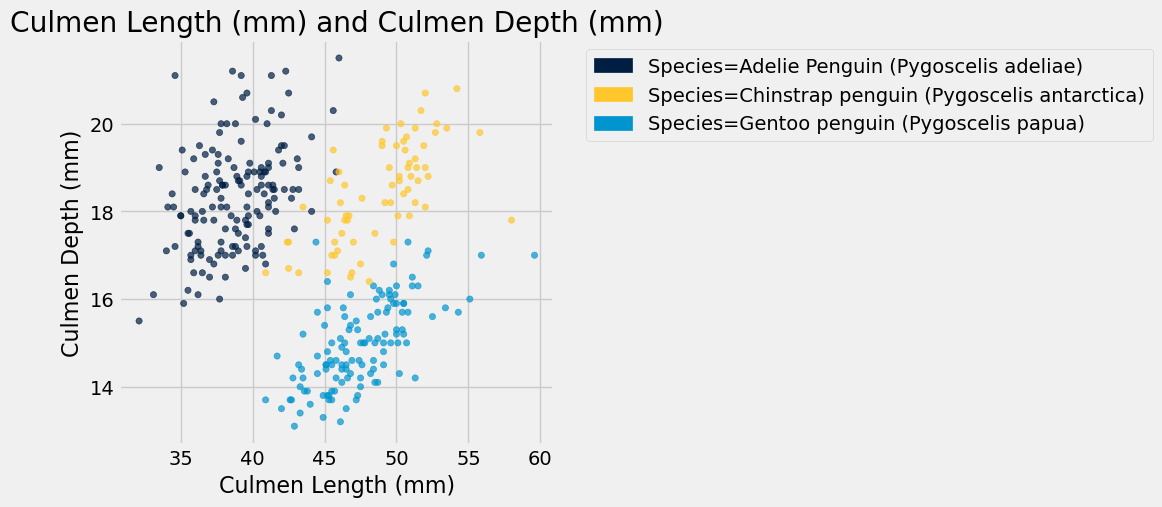

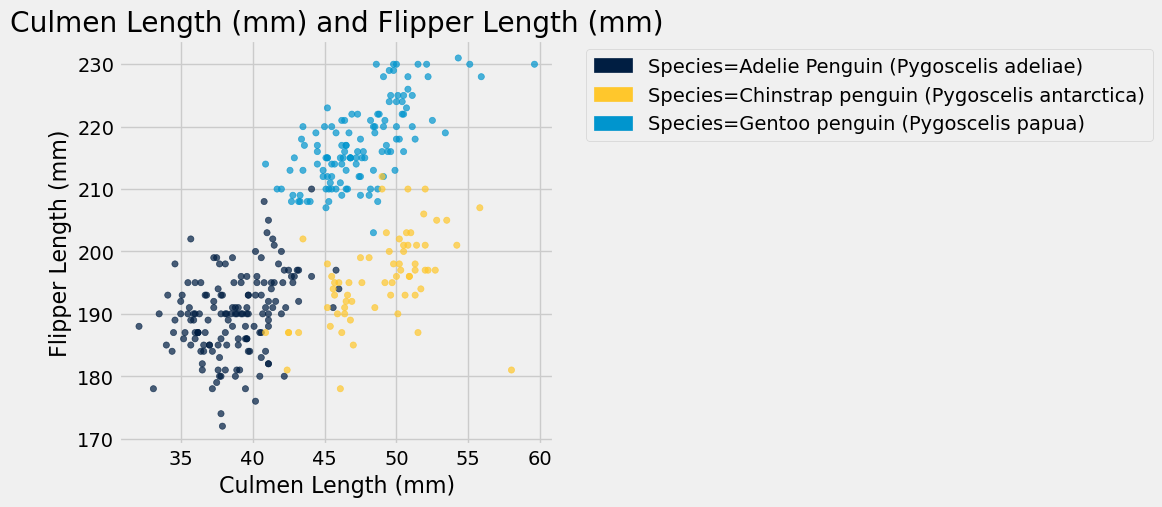

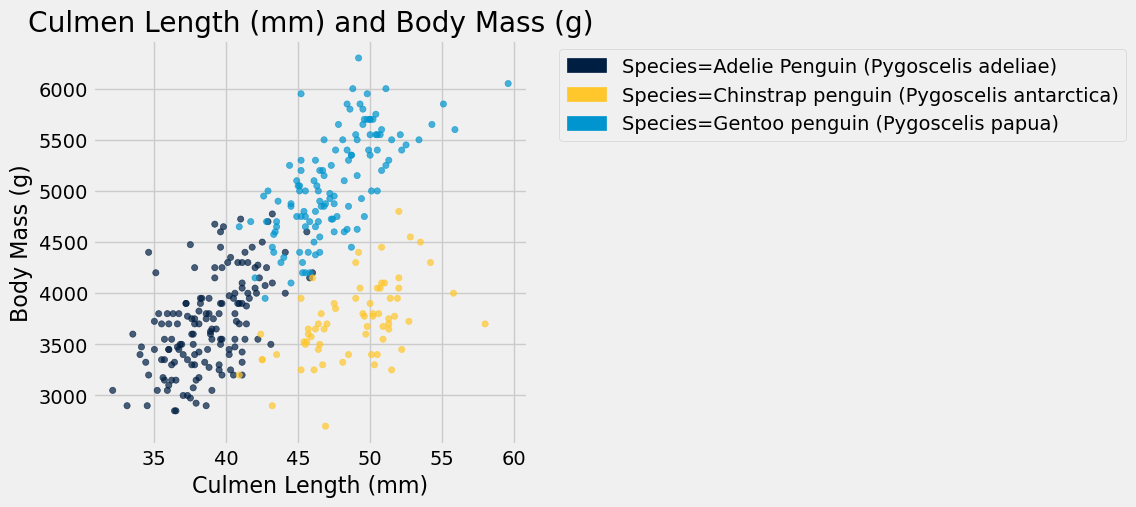

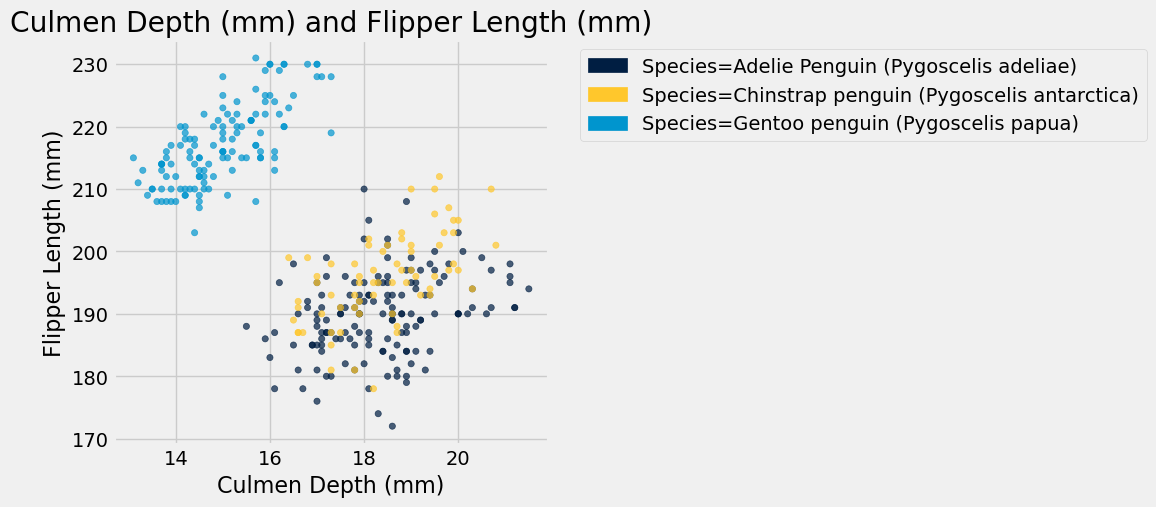

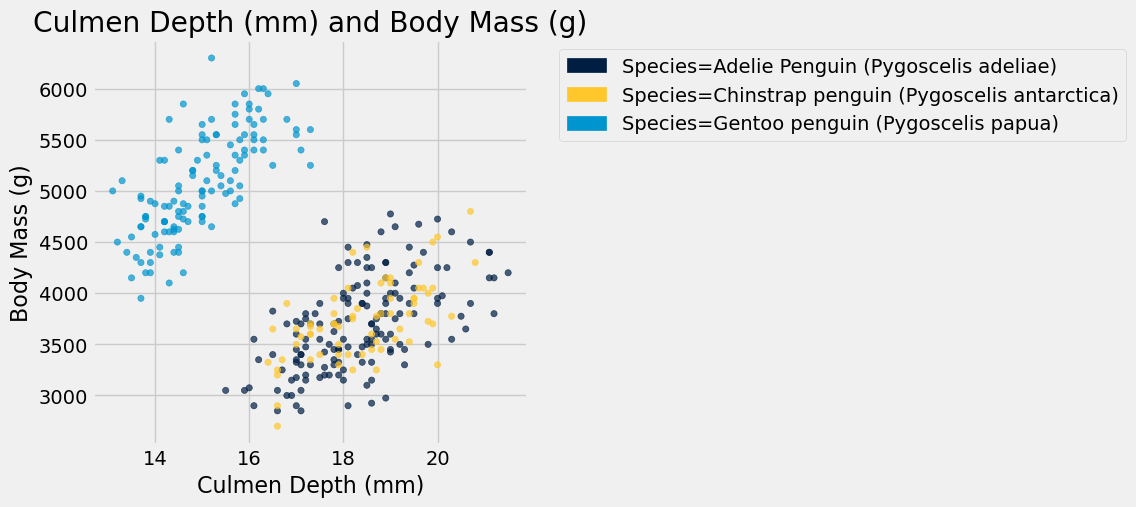

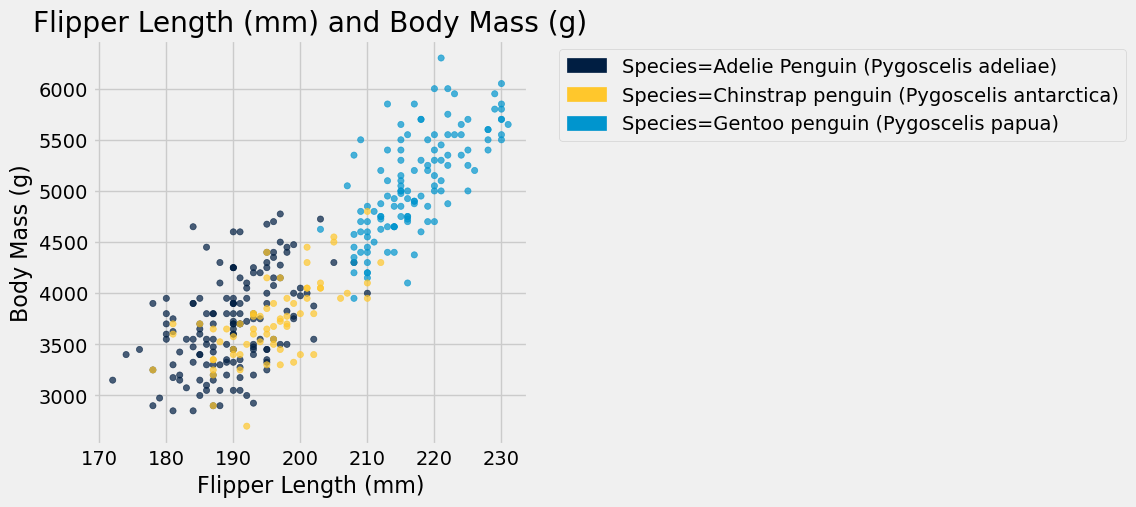

In [ ]:
from itertools import combinations

features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
feature_pairs = np.array(list(combinations(features, 2)))

for feature_pair in feature_pairs:
    penguins.scatter(feature_pair[0], feature_pair[1], group='Species')
    plt.title(f'{feature_pair.item(0)} and {feature_pair.item(1)}')
    plt.show()

<!-- END QUESTION -->

---

### Task 02 📍

Based on the scatter plots, which pair of features do you think best shows separation in the species of penguins?

Assign `a_good_pair` to one of the following integers that represent a good pair of features for showing separation of penguin species (especially for Andélie penguins):

1. Culmen Length (mm) and Culmen Depth (mm)
2. Culmen Length (mm) and Flipper Length (mm)
3. Culmen Length (mm) and Body Mass (g)
4. Culmen Depth (mm) and Flipper Length (mm)
5. Culmen Depth (mm) and Body Mass (g)
6. Flipper Length (mm) and Body Mass (g)

In [ ]:
a_good_pair = 2

In [ ]:
grader.check("task_02")

task_02 results: All test cases passed!
task_02 - 1 message: ✅ We agree with your choice! We don't feel there are is a clear winner, but there are two pairs that do a good job at showing the separation of the species types.

---

## Binary Classification

---

There are three islands (Biscoe, Dream, and Torgersen) represented in this data set.

Run the following code cell to the distribution of island and species combinations.

In [ ]:
(penguins.select('Island', 'Species')
         .group(['Island', 'Species']))

Island,Species,count
Biscoe,Adelie Penguin (Pygoscelis adeliae),44
Biscoe,Gentoo penguin (Pygoscelis papua),123
Dream,Adelie Penguin (Pygoscelis adeliae),56
Dream,Chinstrap penguin (Pygoscelis antarctica),68
Torgersen,Adelie Penguin (Pygoscelis adeliae),51


Adélie penguins can be found on all three islands, but gentoo and chinstrap are not found on all three islands. In fact, the data shows that gentoo penguins inhabit Biscoe and chinstrap penguins inhabit Dream. This means we could easily differentiate between gentoo and chinstrap penguins based on what island the penguin was observed. However, we cannot just identify an Adélie penguin based on the island they are on.

For this reason, we will reduce this classification problem to a binary classification and guide you to build a [kNN classifier](https://ccsf-math-108.github.io/textbook/chapters/17/1/Nearest_Neighbors.html#k-nearest-neighbors) that will classify a penguin as Adélie or not Adélie.

Since you are learning about how kNN works, we'll have you build the classifier in pieces.

---

### Task 03 📍

First, we need to create our binary labels. There are 3 species, but we are just focusing on whether a penguin is an Adélie penguin or not.

1. Write a function `is_adelie` that takes as input the species of a penguin (a `str` value as listed in the `penguins` table) and returns a `bool` value of `True` or `False` depending on whether it is an Adélie penguin or not.
2. Add a column called `Adelie` to the end of the `penguins` table that contains the correct `True`/`False` value for the given penguin.

In [ ]:
def is_adelie(species):
    if species=='Adelie Penguin (Pygoscelis adeliae)':
        return True
    else:
        return False

penguins = penguins.with_column(
    'Adelie', penguins.apply(is_adelie, 'Species')
)


penguins

studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments,Adelie
PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,2007-11-11,39.1,18.7,181,3750,MALE,nan,nan,Not enough blood for isotopes.,True
PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186,3800,FEMALE,8.94956,-24.6945,nan,True
PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18,195,3250,FEMALE,8.36821,-25.333,nan,True
PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193,3450,FEMALE,8.76651,-25.3243,nan,True
PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190,3650,MALE,8.66496,-25.298,nan,True
PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181,3625,FEMALE,9.18718,-25.218,Nest never observed with full clutch.,True
PAL0708,8,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A2,No,2007-11-15,39.2,19.6,195,4675,MALE,9.4606,-24.8996,Nest never observed with full clutch.,True
PAL0708,9,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A1,Yes,2007-11-09,34.1,18.1,193,3475,nan,nan,nan,No blood sample obtained.,True
PAL0708,10,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N5A2,Yes,2007-11-09,42,20.2,190,4250,nan,9.13362,-25.0937,No blood sample obtained for sexing.,True
PAL0708,11,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N6A1,Yes,2007-11-09,37.8,17.1,186,3300,nan,8.63243,-25.2131,No blood sample obtained for sexing.,True


In [ ]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ is_adelie correctly labels an Adélie penguin
task_03 - 2 message: ✅ is_adelie correctly labels an chinstrap penguin
task_03 - 3 message: ✅ is_adelie correctly labels an gentoo penguin
task_03 - 4 message: ✅ You've added the Adelie column to the penguins table.
task_03 - 5 message: ✅ Your updated penguins table seems correct.

---

## Feature Selection

---

We want you to use the features `'Culmen Length (mm)'` and `'Flipper Length (mm)'` to classify Adélie penguins.

Run the following code cell to reduce the `penguins` table down to the relevant information for the rest of this lab.

In [ ]:
penguins = penguins.select('Adelie',
                           'Culmen Length (mm)',
                           'Flipper Length (mm)')
penguins

Adelie,Culmen Length (mm),Flipper Length (mm)
True,39.1,181
True,39.5,186
True,40.3,195
True,36.7,193
True,39.3,190
True,38.9,181
True,39.2,195
True,34.1,193
True,42,190
True,37.8,186


---

## Distance

---

The kNN classifier works by identifying the majority label of the _nearest_ labeled data to the data you are trying to label. To determine the nearest data, we need to measure how far all the data pairs are from the unlabeled data. The (Euclidean) distance ($d$) between two points $(x_1, y_1)$ and $(x_2, y_2)$ was defined for you as $$d = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}.$$ Use this distance to define the distance between two penguins.

From one of the recent lectures, we created a `distance` function and a `row_distance` function for you. The `distance` function does the above calculation for arrays and the `row_distance` function more specifically calculates the distance between two rows of a table where each row contains only numerical data.

Run the following cell to define these functions.

In [ ]:
def distance(pt1, pt2):
    """Return the distance between two points, represented as arrays"""
    return np.sqrt(sum((pt1 - pt2)**2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(np.array(row1), np.array(row2))

---

## Training and Testing Data

---

The kNN algorithm that you will implement is tied to a specific set of data, referred to as a training set. The training set is formed by using a certain percentage of the sample data. A common percentage is 80\%.

If 80\% of the sample data is used for the nearest neighbors classification process, then what is the remaining 20\% used for? The remaining sample data, known as the test set, is reserved for the evaluation of the classifier. You'll go through that process at the end of the lab.

---

### Task 04 📍

Split the `penguins` data into a training set and a testing set.
- The training set should reflect the training data and consist of a random sample of 80\% of the rows of `penguins`
- The testing set should reflect the remaining rows of `penguins`.
Assign the training set to `train` and the testing set to `test`.

**Notes:**
* Try using the `split` table method, or try shuffling penguins and using the `take` table method to accomplish this task.
* To help make sure you are doing the tasks correctly, we'll make sure that you always get the same random training and test sets as everyone else. This is done with the code `np.random.seed(2025)`.

In [ ]:
np.random.seed(2025) # Keep this for grading consistency.

train_size = round(0.8 * penguins.num_rows)


train, test = penguins.split(train_size)
# Inspect train and test
print(f'The following training set contains %{round(train.num_rows / penguins.num_rows * 100)} of the rows of the penguins table.')

display(train)
print(f'\nThe following test set contains %{round(test.num_rows / penguins.num_rows * 100)} of the rows of the penguins table.')
display(test)

The following training set contains %80 of the rows of the penguins table.


Adelie,Culmen Length (mm),Flipper Length (mm)
False,42.4,181
False,46.8,215
True,36.6,184
True,40.1,188
False,49.8,229
True,37.6,194
False,49.1,212
False,48.7,208
True,41.4,202
True,37.7,198



The following test set contains %20 of the rows of the penguins table.


Adelie,Culmen Length (mm),Flipper Length (mm)
False,48.4,213
True,41.6,192
True,45.6,191
False,43.6,217
True,35.7,185
False,43.5,202
True,38.3,189
True,40.5,180
False,46.8,189
True,38.7,195


In [ ]:
grader.check("task_04")

task_04 results: All test cases passed!
task_04 - 1 message: ✅ train is assigned to a Table.
task_04 - 2 message: ✅ test is assigned to a Table.
task_04 - 3 message: ✅ Your training set contains approximately 80 percent of the data.
task_04 - 4 message: ✅ Your test set contains approximately 20 percent of the data.
task_04 - 5 message: ✅ train seems correct.
task_04 - 6 message: ✅ test seems correct

---

## An Example Point

---

Your goal is to be able to classify a penguin as Adélie or not based on the labeled data in Gorman's data set. Let's use the first penguin listed in the `test` table as an example to use for a few tasks. That penguin should have a culmen length of 48.40 mm and a flipper length of 213 mm. You will now make and use a kNN classifier to predict the Adélie label for that penguin. You will be focusing on using table rows to do this. We know the true label for this penguin is `False`, but for now, let's ignore it and see how the classifier works. So an unlabeled example row for that penguin would be:

In [ ]:
an_unlabeled_example = test.drop('Adelie').row(0)
an_unlabeled_example

Row(Culmen Length (mm)=48.399999999999999, Flipper Length (mm)=213.0)

Notice where this example penguin fits within the collected data in `penguin`.

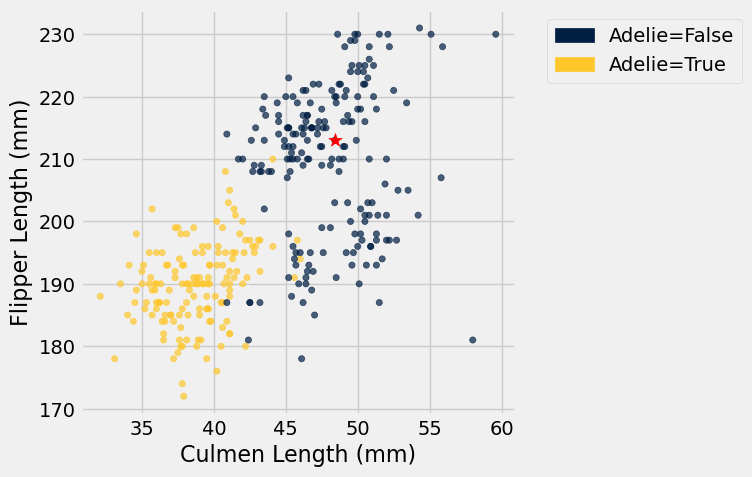

In [ ]:
penguins.scatter('Culmen Length (mm)', 'Flipper Length (mm)', group='Adelie')
plt.scatter(an_unlabeled_example.item(0), an_unlabeled_example.item(1), marker='*', s=100, color='red')
plt.show()

Visually, it seems that the unlabeled example is not an Adélie penguin because it is not near the points of other Adélie penguins. Now, teach the computer how to see that as well!

---

## Building a Classifier

---

### Task 05 📍

For this task, create a function called `distances`. It should:
* Take the following as input:
    * `unlabeled_example` (`Row`): a row object representing an unlabeled example of features,
    * `labeled_features_tbl` (`Table`): a table containing labeled features, like `penguins`, with a column containing `True`/`False` labels, and
    * `label_col` (`str`): a string representing the column in the labeled features table containing the labels.
* It should produce a table (`Table`) as output that contains the same in formation in `labeled_features_tbl` along with an additional column labeled `'Distance'` containing the row distances between a row of features called `unlabeled_example` and every row in `labeled_features_tbl`.

In [ ]:
def distances(unlabeled_example, labeled_features_tbl, label_col):
    distances_array = make_array()
    features = labeled_features_tbl.drop(label_col)

    for row in features.rows:
        dist = row_distance(unlabeled_example, row)
        distances_array = np.append(distances_array, dist)

    labeled_features_tbl = labeled_features_tbl.with_column('Distance', distances_array)
    return labeled_features_tbl

# Here is the results for the unlabeled example:
distances(an_unlabeled_example, penguins, 'Adelie').show(3)

Adelie,Culmen Length (mm),Flipper Length (mm),Distance
True,39.1,181,33.324
True,39.5,186,28.429
True,40.3,195,19.7385


In [ ]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅ Your distances function returns an array.
task_05 - 2 message: ✅ Your distances function correctly shows that two data points with the same features have a distance of 0.
task_05 - 3 message: ✅ Your function seems to be working with an_unlabeled_example.

---

### Task 06 📍

With a way to calculate distances between penguins based on their numerical attributes, the next part of the kNN process is to find the `k` nearest points.

Define a function called `closest`.
1. The function should have 4 input arguments:
    * `labeled_features_tbl`: a table of labeled features (e.g. `penguins`)
    * `unlabeled_example`: an example row (e.g. `an_unlabeled_example`)
    * `label_col`: a column label that indicates which columns contain the labels (e.g. `'Adelie'`)
    * `k`: an odd integer that indicates the number of nearest points to consider (e.g. `5`)
2. If the value of `k` is even, the function should return an error. Otherwise, the function should return a table with the `k` nearest rows in the `labeled_features_tbl` table to the row `unlabeled_example`.

**Note:** We'll help you raise the error since that is not part of this class; however the if/then programming logic is part of this class. 🤓

In [ ]:
def closest(unlabeled_example, labeled_features_tbl, label_col, k):
    '''
    Return a table of the k (odd) closest neighbors to the unlabeled example
    '''
    if k % 2 == 0:
        # Raise an error since k should be odd
        raise ValueError("The value of k should be odd.")
    else:
        # Use the value of k to make a table of the k closest rows
        distances_tbl = distances(unlabeled_example, labeled_features_tbl, label_col)
        distances_tbl_sorted = distances_tbl.sort('Distance')
        nearest_k = distances_tbl_sorted.take(range(k))
        return nearest_k

# Test even and odd values of k to see if your function is working

k_odd = 5
k_even = 4

# Test with k = 5 (odd)
try:
    result_odd = closest(an_unlabeled_example, penguins, 'Adelie', k_odd)
    print("Closest neighbors with k = 5:")
    display(result_odd)
except ValueError as the_error:
    print(the_error)

# Test with k = 4 (even)
try:
    result_even = closest(an_unlabeled_example, penguins, 'Adelie', k_even)
    print("Closest neighbors with k = 4:")
    display(result_even)
except ValueError as the_error:
    print(the_error)

Closest neighbors with k = 5:


Adelie,Culmen Length (mm),Flipper Length (mm),Distance
False,48.4,213,0
False,49,212,1.16619
False,49.1,212,1.22066
False,47.5,212,1.34536
False,47.4,212,1.41421


The value of k should be odd.


In [ ]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your function doesn't accept even values of k.
task_06 - 2 message: ✅ Your function returns a table.
task_06 - 3 message: ✅ Your function returns a table with k rows.
task_06 - 4 message: ✅ Your function returns a table where the Distance values are sorted in ascending order.
task_06 - 5 message: ✅ Your function seems to be working correctly for an_unlabeled_example.

---

### Task 07 📍

Using the fact that `closest` returns the `k` closest rows in the data table to the provided example, create a function called `majority_class` that takes a table (`top_k_closest`) as input and returns the majority label associated with those `k` rows.

In [ ]:
def majority_class(top_k_closest):
    labels = top_k_closest.column('Adelie')
    num_true = sum(labels)                  # True counts as 1, False as 0
    num_false = len(labels) - num_true      # Total minus number of Trues gives number of Falses

    if num_true > num_false:
        return True
    else:
        return False


In [ ]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your majority_class function returns a label from the data.
task_07 - 2 message: ✅ The kNN classifier with k=5 and this data should return False.

---

### Task 08 📍

Finally, using the `majority_class` and `closest` functions, create your kNN classifier as a function called `knn_classifier`.

1. The function should have 4 input arguments:
    * `labeled_features_tbl`: a table of labeled features (e.g. `penguins`)
    * `unlabeled_example`: an example row (e.g. `an_unlabeled_example`)
    * `label_col`: a column label that indicates which columns contain the labels (e.g. `'Adelie'`)
    * `k`: an integer value that indicates the number of nearest points to consider (e.g. `5`)
2. The function should return a `bool` value for whether the unlabeled example is an Adélie penguin or not using the kNN algorithm.

In [ ]:
def knn_classifier(unlabeled_example, labeled_features_tbl, label_col, k):
    # Get the k closest neighbors
    top_k = closest(unlabeled_example, labeled_features_tbl, label_col, k)

    # Return the majority label among them
    return majority_class(top_k)


In [ ]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ knn_classifier doesn't classify an_unlabeled_example as an Andelie penguin.
task_08 - 2 message: ✅ knn_classifier classifies our other text example as an Andelie penguin.

---

## Classifier Accuracy

---

Great work building a classifier! It did a great job classifying the first row of the test set, but how good of a job does it do in general?

A standard way to analyze how well a classifier does is to measure its accuracy in predicting the labels of the data in the test set. You can do this by:

1. Using the classifier (including the training data) to predict the labels for the data in the test set.
2. Define the accuracy of the model to be the proportion of the correctly labeled data points in the testing data set.

Over the next few tasks, we'll help you define the accuracy of your classifier.

---

### Task 09 📍

Now, use the `train` and `test` tables to calculate the accuracy of your kNN classifer `knn_classifier`. We'll guide you through this in a few steps:
1. Use the `train` set with the `knn_classifier` and `k=3` to create an array `predicted_labels` of the predicted labels for all the rows of the `test` table.
2. Create a table called `test_with_predictions` that is copy of `test with an added column called `'Predicted Adelie'` containing the predictions in `predicted_labels`.
3. Create an array called `success` that contains `bool` values showing whether or not the predicted label was correct for each row of the test set.
4. Assign `accuracy_k_3` to the proportion of `True` values in `success`.

In [ ]:
# Step 1
predicted_labels = make_array()

# Loop through each row in the test set
for row in test.rows:
    # Get the feature values explicitly (using column names)
    unlabeled_example = make_array(row.item('Culmen Length (mm)'), row.item('Flipper Length (mm)'))

    # Use knn_classifier to predict the label for this row
    prediction = knn_classifier(unlabeled_example, train, 'Adelie', 3)

    # Append the prediction to the predicted_labels array
    predicted_labels = np.append(predicted_labels, prediction)

# Step 2: Create the test_with_predictions table
test_with_predictions = test.with_column('Predicted Adelie', predicted_labels)

# Step 3: Create the success array to check if the prediction is correct
success = test_with_predictions.column('Adelie') == test_with_predictions.column('Predicted Adelie')

# Step 4: Calculate the accuracy_k_3 as the proportion of True values in success
accuracy_k_3 = success.mean()

# Print the accuracy
print(f'The accuracy of your kNN classifier (with k = 3) using your randomly \
generated train and test sets is: {accuracy_k_3*100:.02f}%.')


The accuracy of your kNN classifier (with k = 3) using your randomly generated train and test sets is: 95.59%.


In [ ]:
grader.check("task_09")

task_09 results: All test cases passed!
task_09 - 1 message: ✅ predicted_labels contains True (1) or False (0) values.
task_09 - 2 message: ✅ test_with_predictions appears to be a copy of test with an extra column of predictions.
task_09 - 3 message: ✅ The accuracy you calculated is above 90%

---

Now, when you apply the classifier you built to a new data point (pair of culmen lengths and flipper length measurements), you can more confidently believe it will correctly label the species of the penguin.

---

### Task 10 📍🔎

<!-- BEGIN QUESTION -->

Fine-tuning existing classifiers to improve performance metrics like accuracy is a big part of machine learning. Since kNN classifiers use all the available data to make a prediction, there are not many parameters to adjust to improve accuracy.

For this task, try at least one of the following ideas to improve the accuracy of your classifier:
* Finding an optimal value for `k`. In this class, that means try some different values of `k`.
* Pick different or more features. We used culmen length and flipper length, but maybe there is a better pair of features or maybe it is better to consider more features at once.
* Standardize the data so that the scale of the data values for each feature doesn't cause a bias in one feature. Maybe culmen length and flipper length are great, but if we standardize the data, then we might see that flipper length has less of a biased influence on the classification. Right now flipper lengths are above 100 in general, but culmen lengths are less than 100 in general.

In [ ]:
# Step 1: Loop through various k values and calculate the accuracy for each
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    predicted_labels = make_array()

    for row in test.rows:
        unlabeled_example = make_array(row.item('Culmen Length (mm)'), row.item('Flipper Length (mm)'))
        prediction = knn_classifier(unlabeled_example, train, 'Adelie', k)
        predicted_labels = np.append(predicted_labels, prediction)

    test_with_predictions = test.with_column('Predicted Adelie', predicted_labels)
    success = test_with_predictions.column('Adelie') == test_with_predictions.column('Predicted Adelie')
    accuracy = success.mean()
    accuracies.append(accuracy)

# Step 2: Output the results
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"The best k value is {best_k} with an accuracy of {best_accuracy * 100:.2f}%.")


The best k value is 3 with an accuracy of 95.59%.


<!-- END QUESTION -->

---

## Submit Your Assignment to Canvas

Follow these steps to submit your lab assignment:

1. **Check the Assignment Completion Requirements:** This assignment is scored as Complete or Incomplete. Make sure to check with your instructor about their requirements for a Complete score.
2. **Run the Auto-Grader:** Ensure you have executed the code cell containing the command `grader.check_all()` to run all tests for auto-graded tasks marked with 📍. This command will execute all auto-grader tests sequentially.
3. **Complete Manually Graded Tasks:** Verify that you have responded to all the manually graded tasks marked with 📍🔎.
4. **Save Your Work:** In the notebook's Toolbar, go to `File -> Save Notebook` to save your work and create a checkpoint.
5. **Download the Notebook:** In the notebook's Toolbar, go to `File -> Download HTML` to download the HTML version (`.html`) of this notebook.
6. **Upload to Canvas:** On the Canvas Assignment page, click "Start Assignment" or "New Attempt" to upload the downloaded `.html` file.

---

## Citations

1. Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Adélie penguins (Pygoscelis adeliae) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 5. Environmental Data Initiative. https://doi.org/10.6073/pasta/98b16d7d563f265cb52372c8ca99e60f (Accessed 2024-05-02).

2. Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female Chinstrap penguins (Pygoscelis antarcticus) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 8. Environmental Data Initiative. https://doi.org/10.6073/pasta/ce9b4713bb8c065a8fcfd7f50bf30dde (Accessed 2024-05-02).

3. Palmer Station Antarctica LTER and K. Gorman. 2020. Structural size measurements and isotopic signatures of foraging among adult male and female gentoo penguins (Pygoscelis papua) nesting along the Palmer Archipelago near Palmer Station, 2007-2009 ver 7. Environmental Data Initiative. https://doi.org/10.6073/pasta/9fc8f9b5a2fa28bdca96516649b6599b (Accessed 2024-05-02).

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

task_02 results: All test cases passed!
task_02 - 1 message: ✅ We agree with your choice! We don't feel there are is a clear winner, but there are two pairs that do a good job at showing the separation of the species types.

task_03 results: All test cases passed!
task_03 - 1 message: ✅ is_adelie correctly labels an Adélie penguin
task_03 - 2 message: ✅ is_adelie correctly labels an chinstrap penguin
task_03 - 3 message: ✅ is_adelie correctly labels an gentoo penguin
task_03 - 4 message: ✅ You've added the Adelie column to the penguins table.
task_03 - 5 message: ✅ Your updated penguins table seems correct.

task_04 results: All test cases passed!
task_04 - 1 message: ✅ train is assigned to a Table.
task_04 - 2 message: ✅ test is assigned to a Table.
task_04 - 3 message: ✅ Your training set contains approximately 80 percent of the data.
task_04 - 4 message: ✅ Your test set contains approximately 20 percent of the data.
task_04 - 5 message: ✅ train seems correct.
task_04 - 6 message: ✅ 